In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# 1. Kaggle Titanic Prediction
#  The first project on this list is one of the most straightforward ML projects you can take on. This project is recommended 
# to complete beginners in the data industry. The Titanic dataset is available on Kaggle, and the link to download it is given below.
# This dataset is of passengers who traveled on the titanic. It has details like passenger age, ticket fare, cabin, and gender.
# Based on this information, you will need to predict whether these passengers survived or not.
# It is a simple binary classification problem, and all you need to do is predict if a particular passenger survived.
# Since this is a classification problem, you can choose to use algorithms like logistic regression, decision trees, 
# and random forests to build the predictive model. You can also choose gradient boosting models like an XGBoost 
# classifier for this beginner-level machine learning project to get better results.


# load dataset
df=pd.read_csv('/kaggle/input/titanic/train.csv')
df=df.drop('PassengerId',axis=1)

# see top five rows from dataset
df.head()



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# check rows and columns in a dataset
df.shape

(891, 11)

In [4]:
# quick overview of a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


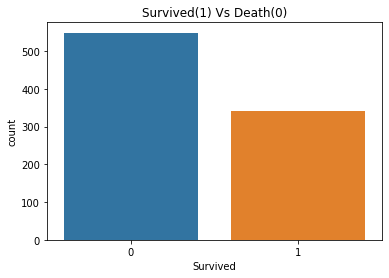

In [5]:
# DATA ANALYSIS WITH HELP SOME DIAGRAMS
plt.title('Survived(1) Vs Death(0)')
sns.countplot(df['Survived'],data=df);


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


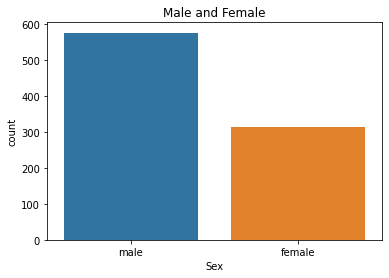

In [6]:
plt.title('Male and Female')
sns.countplot(df['Sex']);

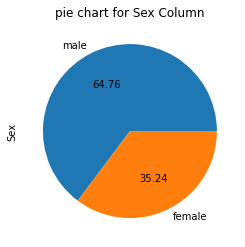

In [7]:
plt.title('pie chart for Sex Column')
df['Sex'].value_counts().plot.pie(autopct='%.2f');

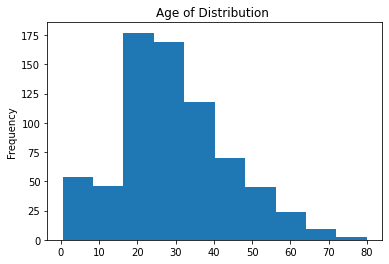

In [8]:
plt.title('Age of Distribution ')
df['Age'].plot.hist(bins=10);

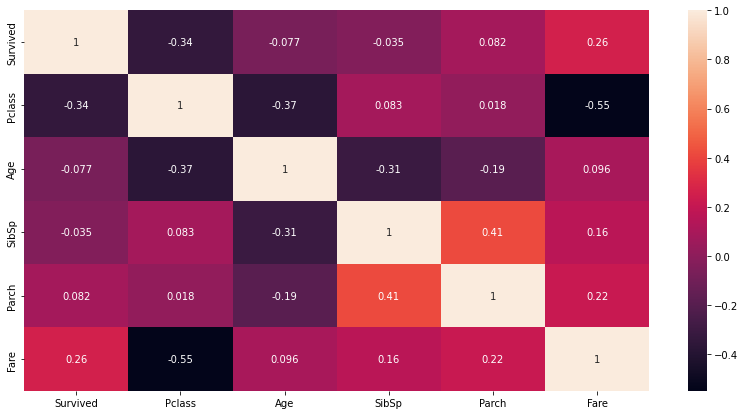

In [9]:
# correlation  between variables
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),annot=True);


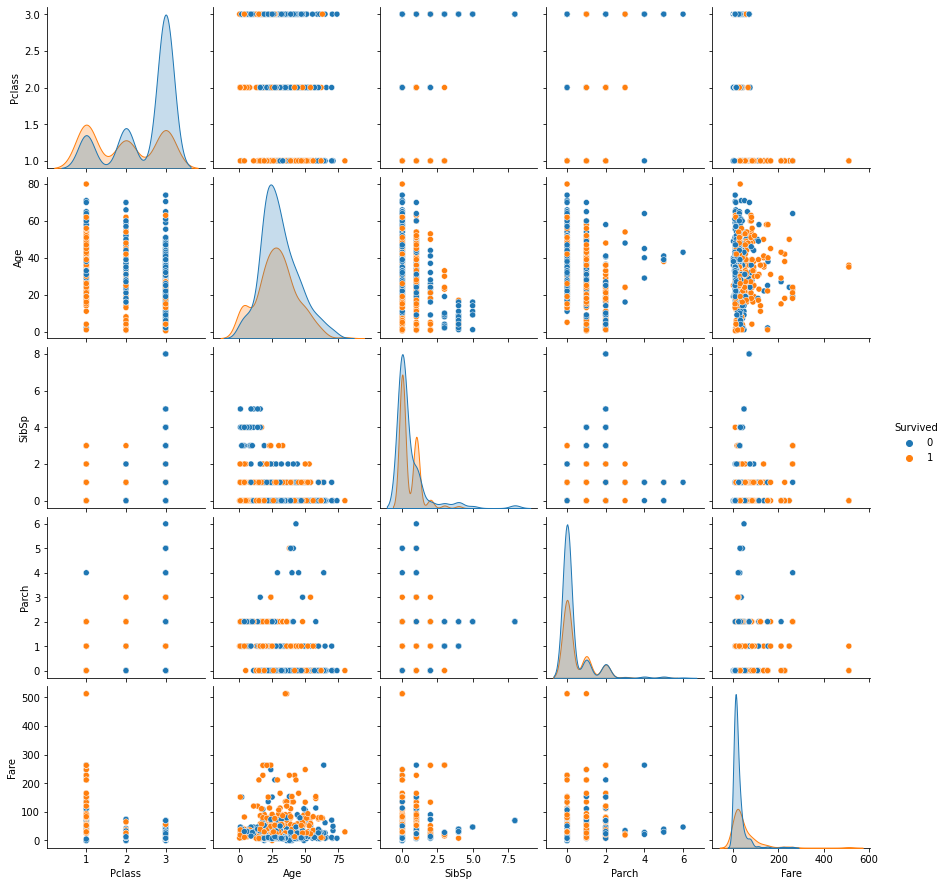

In [10]:
sns.pairplot(df,hue='Survived');

In [11]:
# now i take only important columns  and apply some technique to transform or fixed data to get more valueable columns
df1=df.drop(['Name','Ticket','Cabin'],axis=1)
df1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


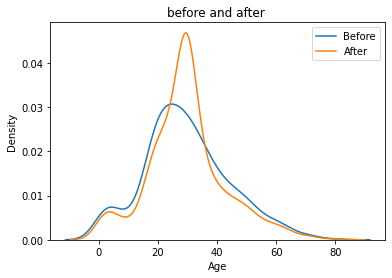

In [12]:
# fill missing values in Age and Embarked columns
dfa=df['Age']
dfa1=dfa.fillna(np.mean(dfa))


plt.title("before and after ")
sns.kdeplot(dfa,label="Before");
sns.kdeplot(dfa1,label="After");
plt.legend();

df1['Age']=df1['Age'].fillna(df1['Age'].mean())
df1['Embarked']=df1['Embarked'].fillna('S')




In [13]:
# change type of Age column 
df1['Age']=df1['Age'].astype(int)
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [14]:
# divide in independent and dependent variable
x=df1.drop('Survived',axis=1)
y=df1['Survived']

In [15]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22,1,0,7.2500,S
1,1,female,38,1,0,71.2833,C


In [16]:
# now we apply dummy variable in Sex and Embarked Columns 

dum_df = pd.get_dummies(x['Sex'], columns=["Sex"],prefix='gender' )
dum_df1 = pd.get_dummies(x['Embarked'], columns=["Embarked"],prefix='place' )
# merge with main df bridge_df on key values
x= x.join(dum_df)
x= x.join(dum_df1)
x




,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,gender_female,gender_male,place_C,place_Q,place_S
0,3,male,22,1,0,7.2500,S,0,1,0,0,1
1,1,female,38,1,0,71.2833,C,1,0,1,0,0
2,3,female,26,0,0,7.9250,S,1,0,0,0,1
3,1,female,35,1,0,53.1000,S,1,0,0,0,1
4,3,male,35,0,0,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27,0,0,13.0000,S,0,1,0,0,1
887,1,female,19,0,0,30.0000,S,1,0,0,0,1
888,3,female,29,1,2,23.4500,S,1,0,0,0,1
889,1,male,26,0,0,30.0000,C,0,1,1,0,0


In [17]:
# drop first column to avoid dummy variable trap and orginal columns also
x.drop(["Sex","Embarked","gender_female","place_C"],axis=1,inplace=True)
x.head(3)

,Pclass,Age,SibSp,Parch,Fare,gender_male,place_Q,place_S
0,3,22,1,0,7.2500,1,0,1
1,1,38,1,0,71.2833,0,0,0
2,3,26,0,0,7.9250,0,0,1


In [18]:
# now we apply feature scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x



array([[ 0.82737724, -0.58004441,  0.43279337, ...,  0.73769513,
        -0.30756234,  0.61583843],
       [-1.56610693,  0.65011226,  0.43279337, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 0.82737724, -0.27250525, -0.4745452 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [ 0.82737724, -0.04185087,  0.43279337, ..., -1.35557354,
        -0.30756234,  0.61583843],
       [-1.56610693, -0.27250525, -0.4745452 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [ 0.82737724,  0.18880351, -0.4745452 , ...,  0.73769513,
         3.25137334, -1.62380254]])

In [19]:
# Logistic Regression and Score In Training Data
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)
lr.score(x,y)

0.8002244668911336

In [20]:
# Decision Tree and Score In Training data (not required feature scaling)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x,y)
dtc.score(x,y)


0.9764309764309764

In [21]:
# Support Vector Classification and Score In Training data 
from sklearn.svm import SVC
svc=SVC()
svc.fit(x,y)
svc.score(x,y)

0.8462401795735129

In [22]:
# last xgboost Classification in Training Dataset
import xgboost
xg=xgboost.XGBClassifier('binary:logistic')
xg.fit(x,y)
xg.score(x,y)

/opt/conda/lib/python3.7/site-packages/xgboost/core.py:502: FutureWarning: Pass `objective` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9595959595959596

In [23]:
# now import test data and apply feature scaling and select columns 
# pick one algo and tuning the model 
